In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files


# Load the file from the uploaded path
file_path = "ev_data_normalized.csv"
data = pd.read_csv(file_path)




In [2]:
data

,Model Year,Electric Range,Longitude,Latitude,County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Legislative District
0,0.807692,0.789318,0.410810,0.664451,0.427885,0.796935,0.957447,0.866667,0.569620,0.0,0.0,0.746667,0.833333
1,0.961538,0.115727,0.411335,0.664644,0.427885,0.796935,0.957447,0.111111,0.962025,1.0,0.0,0.746667,0.833333
2,0.961538,0.115727,0.411096,0.662369,0.427885,0.796935,0.957447,0.111111,0.962025,1.0,0.0,0.746667,0.770833
3,0.730769,0.637982,0.412144,0.664532,0.427885,0.429119,0.957447,0.866667,0.569620,0.0,0.0,0.973333,0.000000
4,0.500000,0.103858,0.404858,0.647698,0.903846,0.628352,0.957447,0.177778,0.936709,1.0,0.0,0.960000,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220220,0.884615,0.000000,0.404858,0.647698,0.903846,0.628352,0.957447,0.444444,0.322785,0.0,0.5,0.960000,0.291667
220221,0.730769,0.637982,0.412346,0.667306,0.841346,0.077905,0.957447,0.866667,0.569620,0.0,0.0,0.960000,0.000000
220222,0.769231,0.652819,0.412346,0.667306,0.841346,0.077905,0.957447,0.866667,0.569620,0.0,0.0,0.960000,0.791667
220223,0.884615,0.094955,0.414300,0.663633,0.427885,0.727969,0.957447,0.200000,0.645570,1.0,0.0,0.973333,0.812500


In [3]:
X = data.drop(columns=['Electric Vehicle Type'])  # Drop irrelevant columns
y = data['Electric Vehicle Type']

# Verify the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (220225, 12)
Target shape: (220225,)


In [4]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 176180
Testing set size: 44045


In [5]:
import numpy as np
import pandas as pd

# Step 1: Identify non-numeric columns in X_train
if not X_train.empty:
    non_numeric_columns = X_train.select_dtypes(include=['object']).columns
    print(f"Non-numeric columns in X_train: {list(non_numeric_columns)}")
else:
    raise ValueError("X_train is empty. Please provide a valid dataset.")

# Step 2: Handle non-numeric features (e.g., using one-hot encoding)
X_train = pd.get_dummies(X_train, columns=non_numeric_columns)
X_test = pd.get_dummies(X_test, columns=non_numeric_columns)

# Step 3: Align columns in X_train and X_test to ensure consistency
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Step 4: Convert features to float32
try:
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
except ValueError as e:
    print(f"Error converting features to float32: {e}")
    raise

# Step 5: Ensure target variables are integers
if not y_train.isnull().any() and not y_test.isnull().any():
    try:
        y_train = y_train.astype(int)
        y_test = y_test.astype(int)
    except ValueError as e:
        print(f"Error converting target variables to integers: {e}")
        raise
else:
    raise ValueError("Target variable contains missing values. Please clean the data.")

# Step 6: Verify shapes and data types
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtypes.unique()}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtypes.unique()}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtypes}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtypes}")


Non-numeric columns in X_train: []
X_train shape: (176180, 12), dtype: [dtype('float32')]
X_test shape: (44045, 12), dtype: [dtype('float32')]
y_train shape: (176180,), dtype: int64
y_test shape: (44045,), dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Update the number of classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")


Number of classes: 2


In [7]:
import xgboost as xgb

# Convert the training and testing data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print("Data successfully converted to DMatrix.")


Data successfully converted to DMatrix.


In [8]:
parameter_sets = [
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.01, "max_depth": 3,
     "subsample": 0.8, "colsample_bytree": 0.8, "lambda": 10, "alpha": 5, "tree_method": "auto"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.05, "max_depth": 4,
     "subsample": 0.9, "colsample_bytree": 0.9, "lambda": 8, "alpha": 4, "tree_method": "exact"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.1, "max_depth": 5,
     "subsample": 0.7, "colsample_bytree": 0.8, "lambda": 15, "alpha": 7, "tree_method": "hist"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.2, "max_depth": 6,
     "subsample": 0.6, "colsample_bytree": 0.7, "lambda": 20, "alpha": 10, "tree_method": "auto"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.3, "max_depth": 7,
     "subsample": 0.8, "colsample_bytree": 0.6, "lambda": 5, "alpha": 3, "tree_method": "exact"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.25, "max_depth": 3,
     "subsample": 0.85, "colsample_bytree": 0.75, "lambda": 12, "alpha": 6, "tree_method": "hist"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.15, "max_depth": 4,
     "subsample": 0.9, "colsample_bytree": 0.9, "lambda": 10, "alpha": 5, "tree_method": "auto"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.08, "max_depth": 5,
     "subsample": 0.75, "colsample_bytree": 0.85, "lambda": 18, "alpha": 9, "tree_method": "exact"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.12, "max_depth": 6,
     "subsample": 0.7, "colsample_bytree": 0.8, "lambda": 8, "alpha": 4, "tree_method": "hist"},
    {"objective": "multi:softmax", "num_class": len(np.unique(y)), "eta": 0.07, "max_depth": 3,
     "subsample": 0.65, "colsample_bytree": 0.9, "lambda": 15, "alpha": 7, "tree_method": "auto"}
]


print("Parameter sets defined successfully!")


Parameter sets defined successfully!


In [9]:
# Train models and generate predictions for each parameter set
trained_models = []
predictions = []

for i, params in enumerate(parameter_sets):
    print(f"Training model with parameter set {i + 1}...")

    # Train the model
    model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100, evals=[(dtest, "test")],
                      early_stopping_rounds=10, verbose_eval=False)
    trained_models.append(model)

    # Make predictions
    y_pred = model.predict(dtest).astype(int)
    predictions.append(y_pred)
    print(f"Model {i + 1} trained successfully!")


Training model with parameter set 1...
Model 1 trained successfully!
Training model with parameter set 2...
Model 2 trained successfully!
Training model with parameter set 3...
Model 3 trained successfully!
Training model with parameter set 4...
Model 4 trained successfully!
Training model with parameter set 5...
Model 5 trained successfully!
Training model with parameter set 6...
Model 6 trained successfully!
Training model with parameter set 7...
Model 7 trained successfully!
Training model with parameter set 8...
Model 8 trained successfully!
Training model with parameter set 9...
Model 9 trained successfully!
Training model with parameter set 10...
Model 10 trained successfully!


In [10]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Ensure classes are treated as strings for the classification report
target_names = [str(cls) for cls in sorted(set(y_test))]  # Convert unique classes to sorted strings

# Initialize a list to store classification reports
classification_reports = []

# Loop through each prediction set (e.g., from different parameter sets or models)
for i, y_pred in enumerate(predictions):
    # Calculate metrics for this parameter set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    print(f"\n=== Classification Report for Parameter Set {i + 1} ===")
    print(f"Accuracy: {accuracy:.7f}")
    print(f"Precision: {precision:.7f}")
    print(f"Recall: {recall:.7f}")
    print(f"F1 Score: {f1:.7f}")

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=target_names, digits=7)
    print(report)

    # Save the report as a dictionary for further use
    report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, digits=7)
    classification_reports.append(report_dict)

# Optionally consolidate reports into a DataFrame for further analysis
report_dfs = []
for i, report_dict in enumerate(classification_reports):
    df = pd.DataFrame(report_dict).transpose()
    df['Parameter_Set'] = f"Set {i + 1}"  # Add parameter set identifier
    report_dfs.append(df)

# Consolidate all DataFrames into one
final_report_df = pd.concat(report_dfs, ignore_index=True)

# Save the final report as a CSV
final_report_path = "final_classification_reports.csv"
final_report_df.to_csv(final_report_path, index=False)
print(f"\nConsolidated classification reports saved to {final_report_path}")

# Display the consolidated DataFrame
print("\nConsolidated Classification Reports:")
print(final_report_df)



=== Classification Report for Parameter Set 1 ===
Accuracy: 0.9929390
Precision: 0.9929896
Recall: 0.9929390
F1 Score: 0.9928969
              precision    recall  f1-score   support

           0  0.9913990 0.9997415 0.9955528     34819
           1  0.9989925 0.9672664 0.9828735      9226

    accuracy                      0.9929390     44045
   macro avg  0.9951957 0.9835040 0.9892131     44045
weighted avg  0.9929896 0.9929390 0.9928969     44045


=== Classification Report for Parameter Set 2 ===
Accuracy: 0.9994324
Precision: 0.9994334
Recall: 0.9994324
F1 Score: 0.9994326
              precision    recall  f1-score   support

           0  0.9999138 0.9993682 0.9996409     34819
           1  0.9976203 0.9996748 0.9986465      9226

    accuracy                      0.9994324     44045
   macro avg  0.9987671 0.9995215 0.9991437     44045
weighted avg  0.9994334 0.9994324 0.9994326     44045


=== Classification Report for Parameter Set 3 ===
Accuracy: 0.9999319
Precision: 0.99

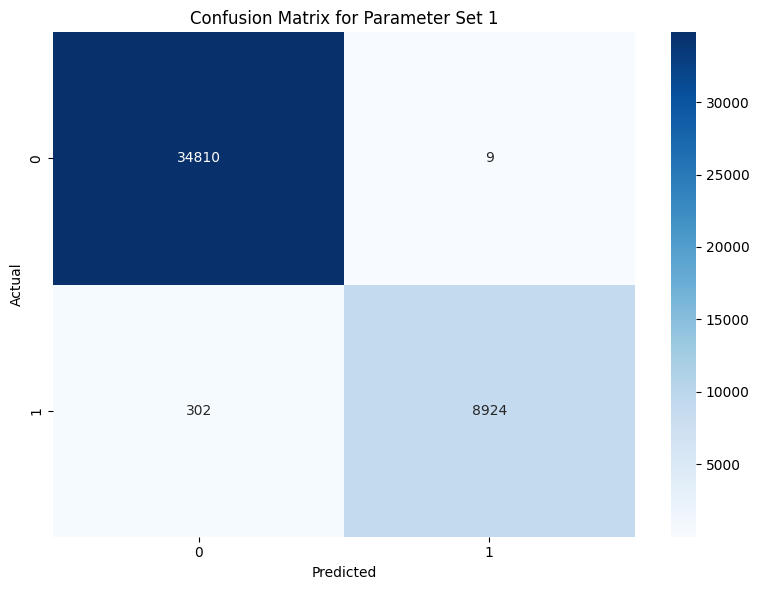

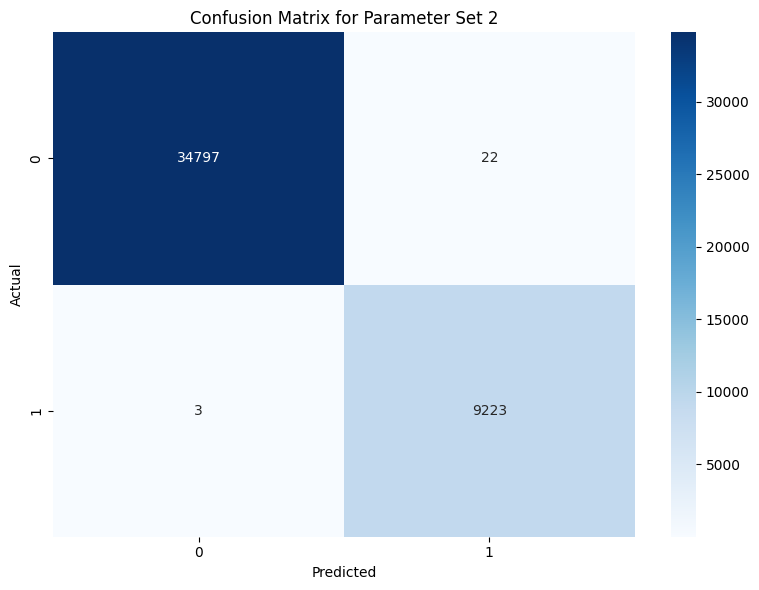

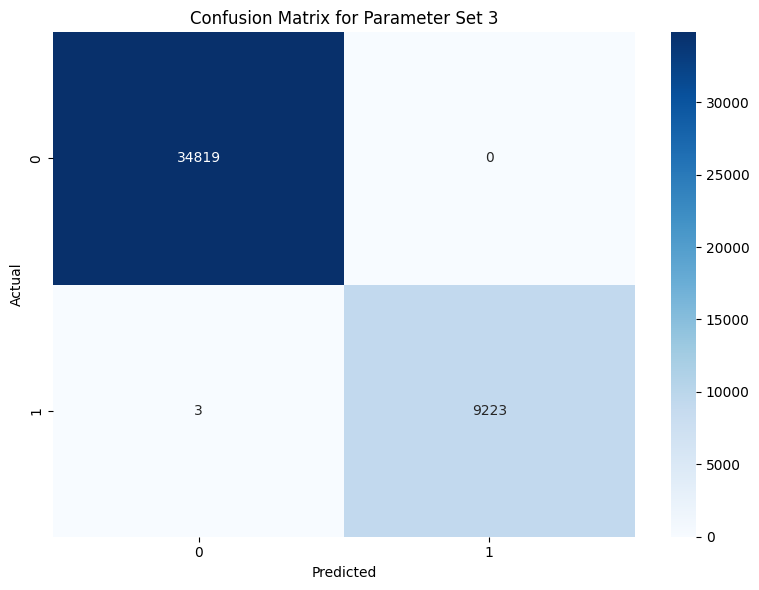

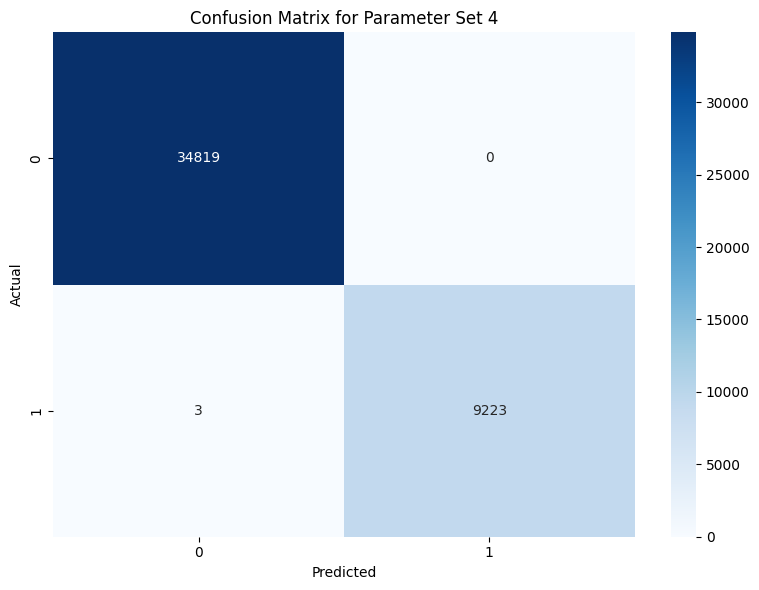

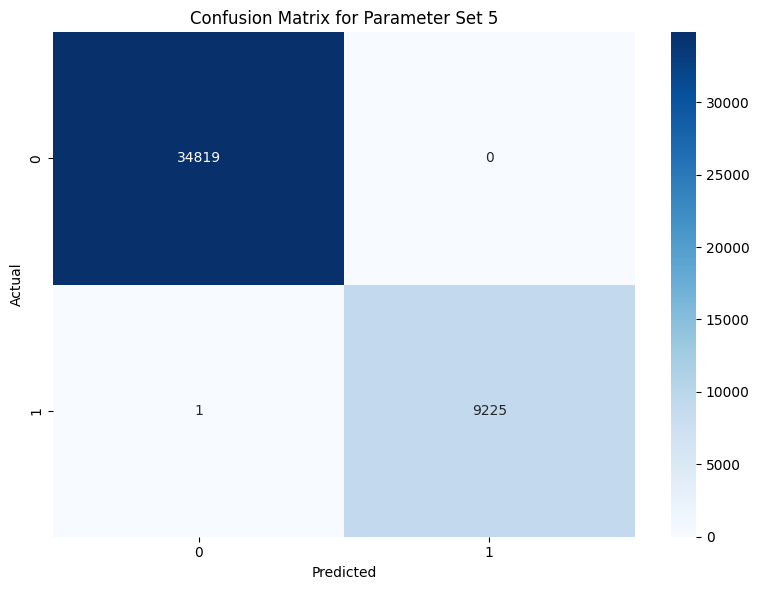

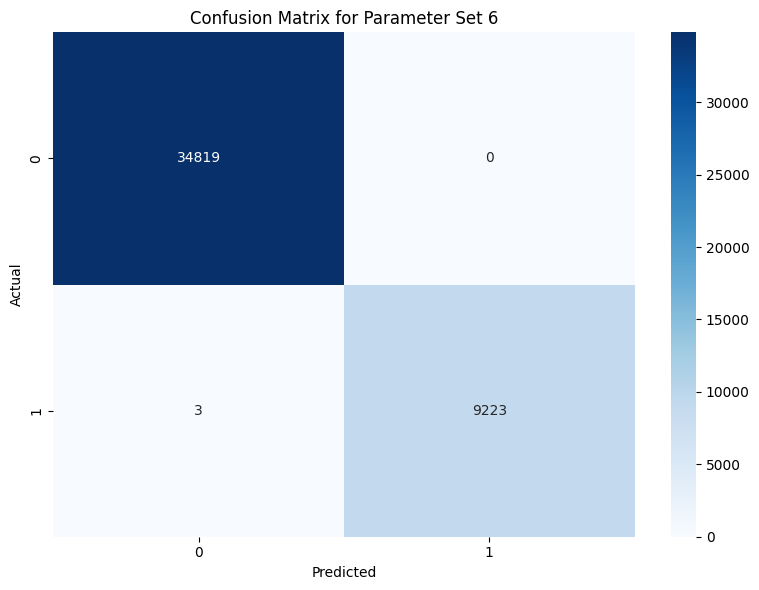

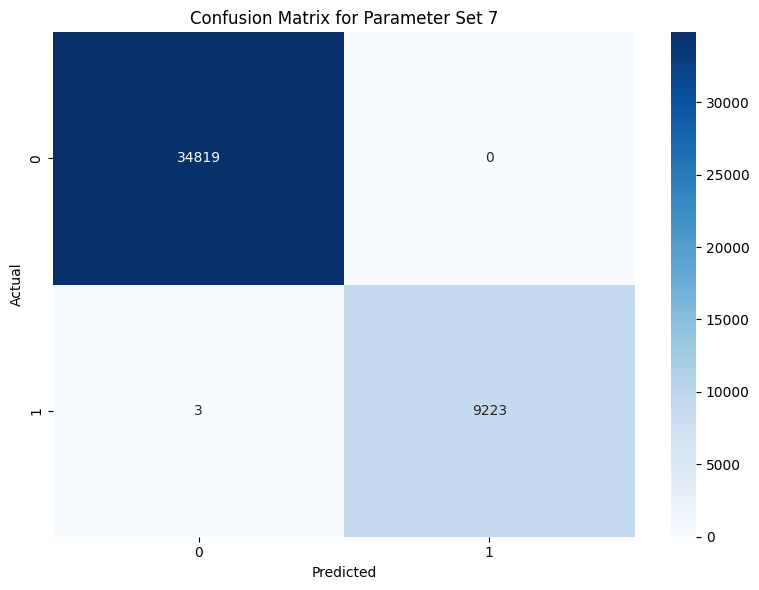

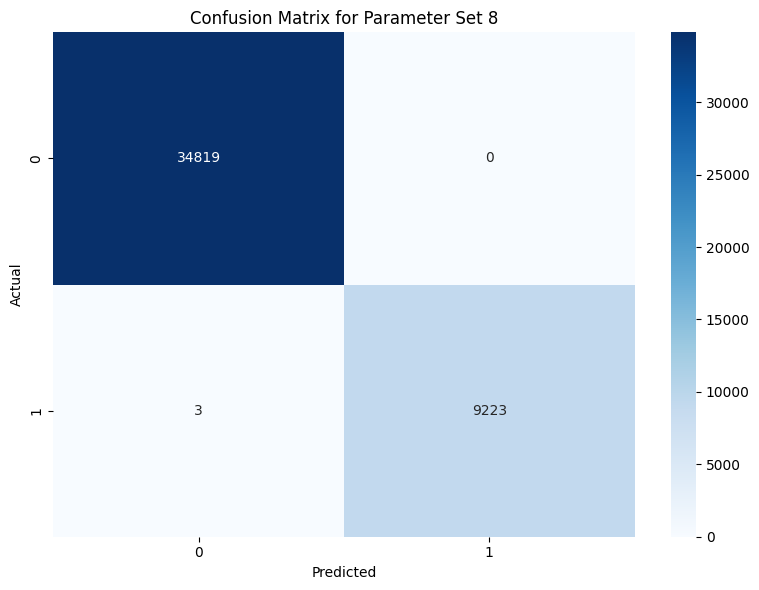

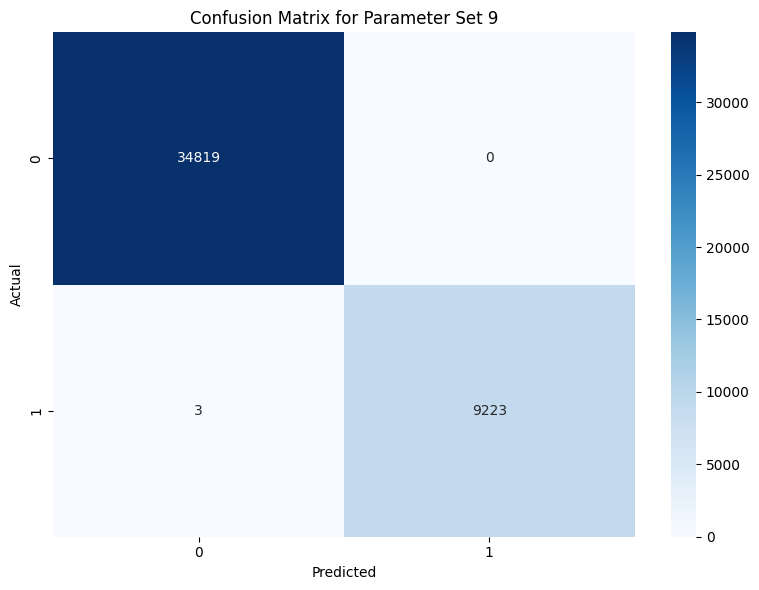

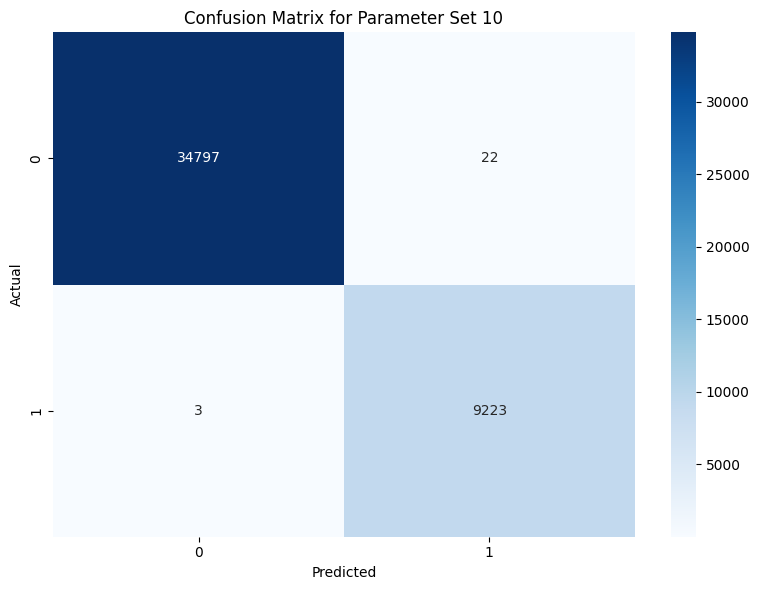

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure class labels are strings
class_labels = [str(cls) for cls in sorted(set(y_test))]

# Plot confusion matrices for each model or parameter set
for i, y_pred in enumerate(predictions):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for Parameter Set {i + 1}")
    plt.tight_layout()  # Adjust layout for better visuals
    plt.show()


In [12]:
import pandas as pd

# Store results for each parameter set
results = []

# Ensure no mismatch between classification reports and parameter sets
if len(classification_reports) == 0 or len(parameter_sets) == 0:
    raise ValueError("classification_reports or parameter_sets cannot be empty.")

num_parameter_sets = min(len(classification_reports), len(parameter_sets))
if len(classification_reports) != len(parameter_sets):
    print(f"Warning: Mismatch detected. Processing the first {num_parameter_sets} entries.")

# Process each classification report with corresponding parameters
for i in range(num_parameter_sets):
    try:
        report = classification_reports[i]
        report_df = pd.DataFrame(report).transpose()  # Convert report to DataFrame
        report_df = report_df.reset_index()          # Reset index for cleaner format
        report_df['Parameter_Set'] = i + 1          # Add parameter set identifier

        # Add parameters to the DataFrame
        for param, value in parameter_sets[i].items():
            report_df[param] = value

        # Append to results
        results.append(report_df)
    except Exception as e:
        print(f"Error processing parameter set {i + 1}: {e}")

# Consolidate all results into a single DataFrame
try:
    final_results = pd.concat(results, ignore_index=True)

    # Highlight best metrics (optional, can be removed if unnecessary)
    for metric in ['precision', 'recall', 'f1-score']:
        final_results[f'Best_{metric}'] = final_results.groupby('index')[metric].transform(
            lambda x: (x == x.max()).astype(int)
        )

    # Save to CSV
    output_csv_path = 'final_parameter_classification_results.csv'
    final_results.to_csv(output_csv_path, index=False)
    print(f"Consolidated classification reports and parameters saved to {output_csv_path}")
except Exception as e:
    print(f"Error consolidating or saving results: {e}")


Consolidated classification reports and parameters saved to final_parameter_classification_results.csv
